In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

path = 'C:/Users/matys/Downloads/data_glass'
file_with_matrix = '/glass.csv'

df = pd.read_csv(path+file_with_matrix, sep=',')

df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [34]:
df.isnull().values.any()


False

In [35]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [36]:
stats = df.describe()
stats


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


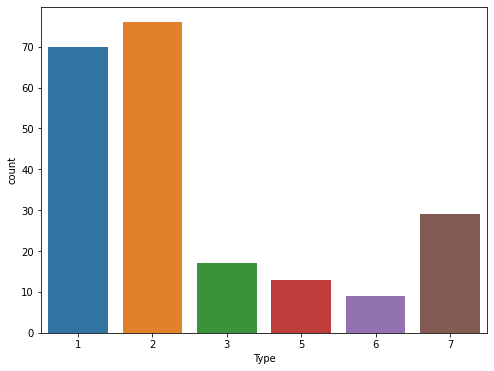

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x="Type")
plt.show()

In [38]:
from sklearn.model_selection import train_test_split



numerical_values = df.drop(['Type'], axis=1)
categorical_values = df['Type'].to_list()

scaler = StandardScaler()
scaler.fit(numerical_values)
new_numerical_values = scaler.transform(numerical_values)

new_df = pd.DataFrame(new_numerical_values, columns=list(set(df.columns) - {'Type'}))
new_df['Type'] = categorical_values


In [39]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

x_train, x_test, y_train, y_test = train_test_split(new_numerical_values, categorical_values, train_size=0.75, stratify=categorical_values)

kernel = 1.0 * RBF(1.0)
gpc_classifier = GaussianProcessClassifier(kernel=kernel)

gpc_classifier.fit(x_train, y_train)
gpc_type_predictions = gpc_classifier.predict(x_test)



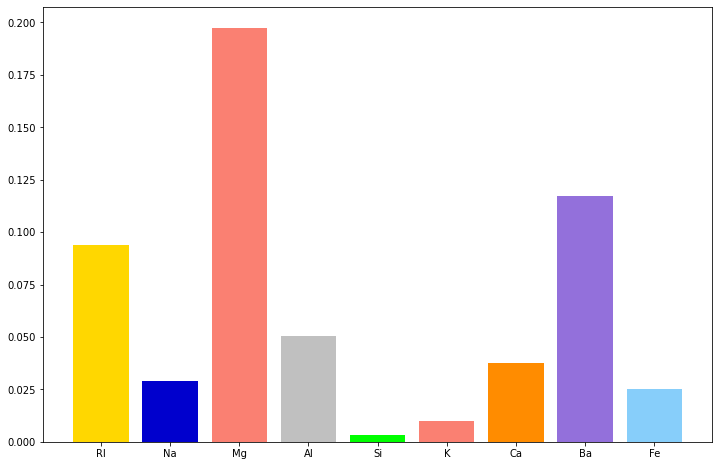

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

rfc_classifier = RandomForestClassifier()
rfc_classifier.fit(x_train, y_train)
rfc_type_predictions = rfc_classifier.predict(x_test)

features_importance = permutation_importance(rfc_classifier, x_test, y_test, n_repeats=30, random_state=23)

chemical_elements = numerical_values.columns
fig = plt.figure(figsize=(12,8))
plt.bar(chemical_elements, features_importance['importances_mean'], color=['#FFD700','#0000CD','#FA8072','#C0C0C0', '#00FF00', '#FA8072', "#FF8C00", '#9370DB', '#87CEFA'])
plt.show()


In [41]:
def drawing_conf_matrix(y_test, predictes_values, title):
    conf_matrix = confusion_matrix(y_test, predictes_values)

    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)

    sns.heatmap(conf_matrix, cmap='cividis' , square=True, annot=True, cbar=True,
            xticklabels=[str(i) for i in range(1, 7)],
            yticklabels=[str(i) for i in range(1, 7)])

    plt.xlabel('Prediction')
    plt.ylabel('Real value')
    plt.title(title, fontsize=20)

    plt.show()

GPC accuracy

Test accuracy: 0.7037037037037037
Test recall score: 0.7037037037037037



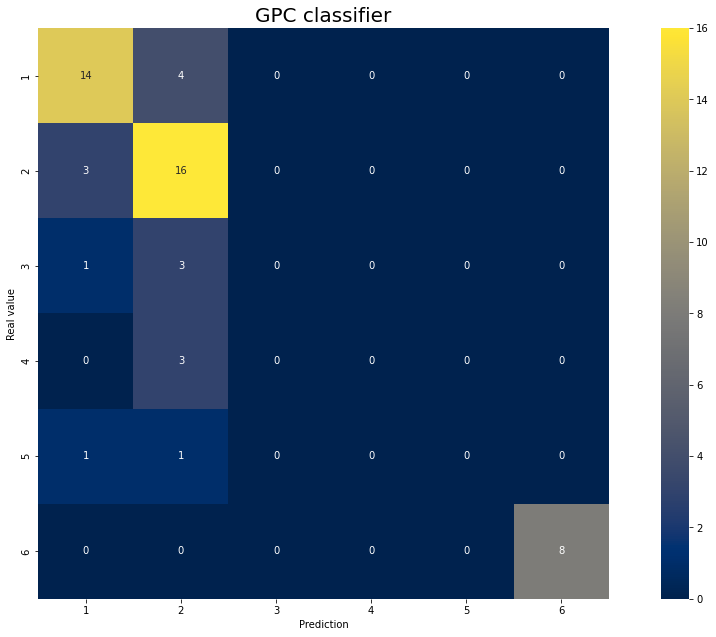

In [42]:
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix

print("GPC accuracy\n")
print(f"Test accuracy: {accuracy_score(y_test, gpc_type_predictions)}")
print(f"Test recall score: {recall_score(y_test, gpc_type_predictions, average='micro')}\n")

drawing_conf_matrix(y_test, gpc_type_predictions, 'GPC classifier')

RFC accuracy

Test accuracy: 0.8703703703703703
Test recall score: 0.8703703703703703



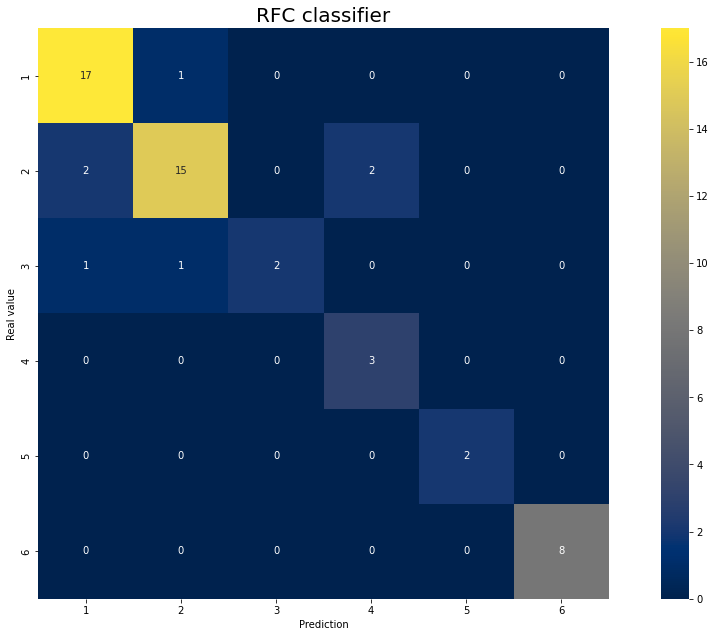

In [43]:
print("RFC accuracy\n")
print(f"Test accuracy: {accuracy_score(y_test, rfc_type_predictions)}")
print(f"Test recall score: {recall_score(y_test, rfc_type_predictions, average='micro')}\n")

drawing_conf_matrix(y_test, rfc_type_predictions, 'RFC classifier')

Diffrent metrics can return diffrent results due to the fact that they use various approaches and techniques to calculate final result. Each of them should be used in proper way, depends on problem, data and purpose.